### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Displaying the data

In [3]:
extreme_list = pd.read_csv("./extremelist.csv")
extreme_list


,Seed,T1,D1,Ratio1,T2,D2,Ratio2,H,m,Original_m,Percentage_m,Command
0,47892,100,123.514314,1.235143,155,163.843142,1.057053,3100,1,54,0.053571,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
1,6655,89,94.477904,1.061549,178,156.679610,0.880223,178,2,5,0.571429,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
2,9370,74,64.683957,0.874108,10,9.356604,0.935660,370,3,50,0.096154,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
3,14800,26,20.777885,0.799149,11,11.508614,1.046238,286,4,40,0.142857,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
4,41018,33,42.742912,1.295240,1986,1597.003544,0.804131,21846,5,723,0.009655,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
5,18786,190,192.613960,1.013758,2062,1478.628395,0.717085,195890,6,1135,0.007036,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
6,55525,824,821.907941,0.997461,219,215.628885,0.984607,180456,7,1048,0.008571,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
7,77199,3534,3734.818093,1.056825,1068,750.590134,0.702800,629052,8,772,0.012920,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
8,95053,4696,3495.267783,0.744307,6656,7518.020446,1.129510,3907072,9,1422,0.007725,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...
9,30525,2089,2471.464898,1.183085,11675,10114.652925,0.866351,24389075,10,13770,0.000871,/home/jannethestefaniahoyosrea/UniTO/ricerca/e...


#### For a specific value of the parameter m (m=4) we plot the minimal constraints and the convex hull connecting them 

array([[1.        , 1.        ],
       [1.25133042, 0.52940902],
       [1.1551133 , 0.97740357],
       [1.04513565, 0.99488874]])

array([0, 1, 2, 3], dtype=int32)

Number of vertices:  4


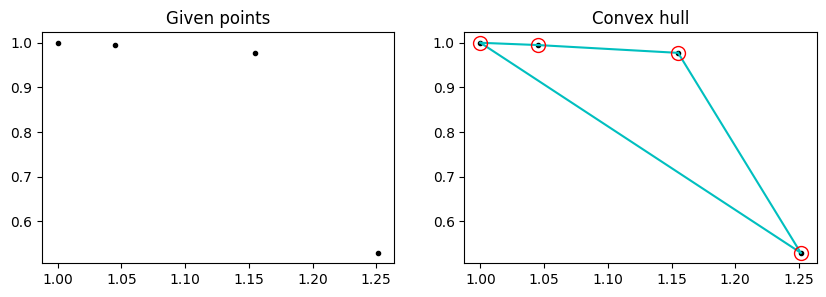

In [4]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

m4 = pd.read_csv("./n-2_m-4.csv")

#commentare utilizzo 
data = m4

# Input is 2D array with a_1 and a_2 components of 12-th dataset
a_1 = np.array(data['a_1'])
a_2 = np.array(data['a_2'])
                  
points = np.array([a_1, a_2]).T
display(points)

hull = ConvexHull(points, incremental=False, qhull_options='Fx')

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

for ax in (ax1, ax2):
    ax.plot(points[:, 0], points[:, 1], '.', color='k')
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)

display(hull.vertices)
print("Number of vertices: ", len(hull.vertices))
plt.show()
